[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/okada-tak/deep-learning-from-scratch/blob/master/notebooks/ch06.ipynb)
[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/okada-tak/deep-learning-from-scratch/blob/master/notebooks/ch06.ipynb)  
# ■ch06/xxxx.py以外は追記（岡田）
# 6章 学習に関するテクニック のまとめ
- パラメータの更新方法には、SGDの他に、有名なものとして、MomentumやAdaGrad、Adamなどの手法がある。  
- 重みの初期値の与え方は、正しい学習を行う上で非常に重要である。  
- 重みの初期値として、「Xavierの初期値」や「Heの初期値」などが有効である。  
　sigmoid, tanh：Xavierの初期値（標準偏差が$\sqrt{\frac{1}{n}}$のガウス分布）  
　ReLU：Heの初期値（標準偏差が$\sqrt{\frac{2}{n}}$のガウス分布）  
　※$n$：前層のノード数  
がよく使われる。
- Batch Normalizationを用いることで、学習を速く進めることができ、また、初期値に対してロバストになる。  
- 過学習を抑制するための正則化の技術として、Weight decayやDropoutがある。  
- ハイパーパラメータの探索は、良い値が存在する範囲を徐々に絞りながら進めるのが効率の良い方法である。

## 6.1.2 SGD (stochastic gradient descent)
$$
\mathbf W \leftarrow \mathbf W - η\frac{\partial L}{\partial \mathbf W}
$$
$\mathbf W: 重みパラメータ$  
$η: 学習係数$


## 6.1.3 SGDの欠点

$$
f(x,y) = \frac{1}{20}x^2+y^2
$$

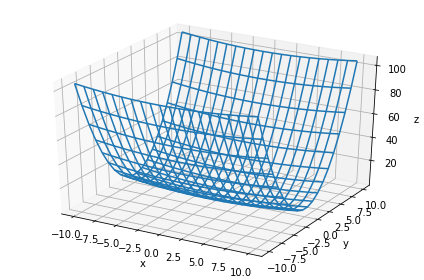

In [ ]:
# p.169のグラフを描く
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# p.168の関数
def function_2(x, y):
    return x**2 / 20 + y**2

data = np.linspace(-10,10,20)
x, y = np.meshgrid(data,data)

# zデータの作成
# z = x**2 + y**2　でもいい
z = function_2(x, y)

ax.plot_wireframe(x,y,z)

# 軸ラベルが見切れたので追加
plt.tight_layout()

plt.show()

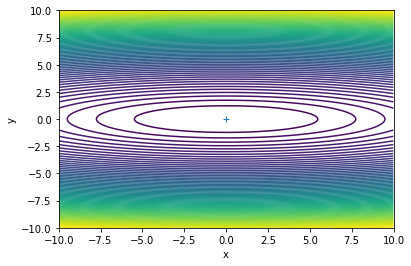

In [ ]:
# p.169の等高線のグラフ
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.01)
y = np.arange(-10, 10, 0.01)

X, Y = np.meshgrid(x, y) 
Z = function_2(X, Y)

# for simple contour line  
#mask = Z > 7
#Z[mask] = 0

plt.contour(X, Y, Z, levels=80)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

p.169 図6-2の勾配のグラフ
$$
\frac{\partial f}{\partial x} = \frac{x}{10}
$$

$$
\frac{\partial f}{\partial y} = 2y
$$

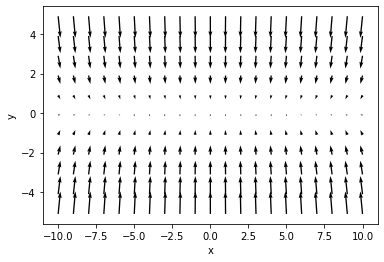

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# 元の関数
def f2(x, y):
    return x**2 / 20 + y**2

# xでの偏微分
def partial_diff_x(x, y):
    return x / 10

# yでの偏微分
def partial_diff_y(x):
    return 2*x

# グリッドデータ作成
x = np.arange(-10, 10.1, 1.0)
y = np.arange(-5.1, 5.1, 1.0)
xx, yy = np.meshgrid(x, y)

# 偏微分の計算
partial_diff_x_matrix = partial_diff_x(xx, yy)
partial_diff_y_matrix = partial_diff_y(yy)

# 描写
plt.quiver(xx, yy, -partial_diff_x_matrix, -partial_diff_y_matrix)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

## 6.1.4 Momentum
$$
\mathbf v \leftarrow α \mathbf v - η\frac{\partial L}{\partial \mathbf W}
$$

$$
\mathbf W \leftarrow \mathbf W + \mathbf v
$$
$\mathbf W: 重みパラメータ$  
$\frac{\partial L}{\partial \mathbf W}: \mathbf Wに関する損失関数の勾配$  
$η: 学習係数$  
$\mathbf v: 速度$  
$α: $ momentum (0.9など)


## 6.1.5 AdaGrad
$$
\mathbf h ← \mathbf h + \frac{∂L}{∂\mathbf W} \odot \frac{∂L}{∂\mathbf W}
$$

$$
\mathbf W \leftarrow \mathbf W - η\frac{1}{\sqrt{\mathbf h}}\frac{\partial L}{\partial \mathbf W}
$$
$\odot: 行列の要素ごとの掛け算$  
$\mathbf W: 重みパラメータ$  
$\frac{\partial L}{\partial \mathbf W}: \mathbf Wに関する損失関数の勾配$  
$η: 学習係数$  
$\mathbf h: 勾配の2乗和を保持する$  



# ch06/optimizer_compare_naive.py

# ■追記（岡田）Colaboratory用
Google Colaboratoryの場合、Google Driveに  
dl-from-scratch/ch06  
というフォルダを用意し、そこにこのjupyter notebookを配置。  
(dl-from-scratchの部分は任意。)  
また、datasetフォルダとcommonフォルダを
dl-from-scratch/dataset  
dl-from-scratch/common
にコピーしておく。  

以下のセルでGoogle Driveをマウント。許可を求められるので許可する。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ■追記（岡田）Colaboratory用
chdirする。

In [2]:
import sys,os
os.chdir('/content/drive/My Drive/dl-from-scratch/')
os.getcwd()

'/content/drive/My Drive/dl-from-scratch'

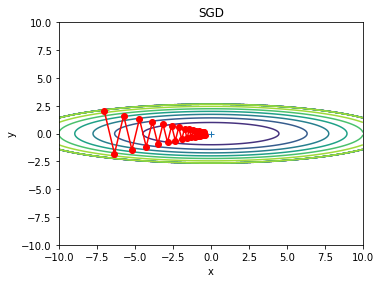

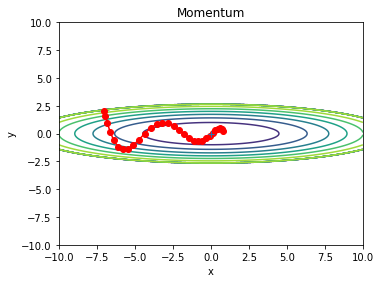

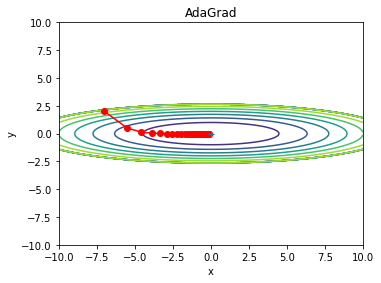

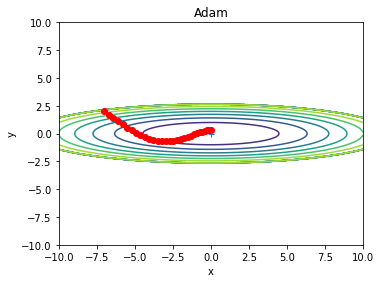

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.figure(figsize=(12,9))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

# ch06/optimizer_compare_mnist.py

===========iteration:0===========
SGD:2.408242718249455
Momentum:2.4068394349139055
AdaGrad:2.399048853500868
Adam:2.1944214827730084
===========iteration:100===========
SGD:1.4838006036312186
Momentum:0.42186019265352653
AdaGrad:0.1908289162678628
Adam:0.3378542776491954
===========iteration:200===========
SGD:0.6389040136786772
Momentum:0.16794397652275167
AdaGrad:0.08875720456184207
Adam:0.12348264009510228
===========iteration:300===========
SGD:0.46480378235552966
Momentum:0.14420780552466841
AdaGrad:0.07464379771654434
Adam:0.10528838920196336
===========iteration:400===========
SGD:0.39548868057941255
Momentum:0.13572647486759665
AdaGrad:0.0697300630156496
Adam:0.1405630630811324
===========iteration:500===========
SGD:0.28667939371789586
Momentum:0.12319715144353018
AdaGrad:0.04046594711361991
Adam:0.07378898604506837
===========iteration:600===========
SGD:0.4203787432917502
Momentum:0.21723350800065033
AdaGrad:0.11933290725927105
Adam:0.14664824336555854
===========iteration:

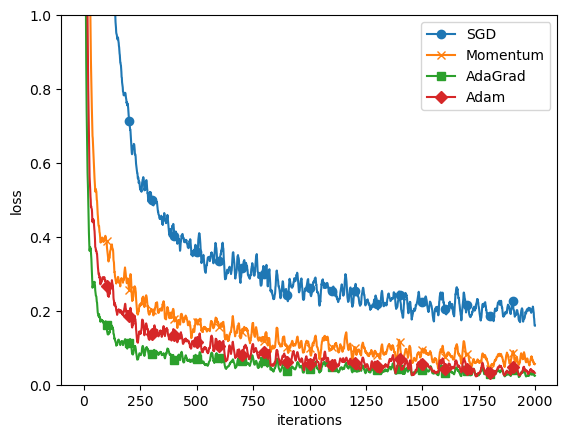

In [ ]:
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


## 参考. G検定勉強時につくったメモ
### 勾配降下法の種類

バッチ勾配降下法  
- 全訓練データを利用して勾配を計算する  
- 局所解から抜け出せない危険があるが必ず収束する

確率的勾配降下法(SGD)  
- 全訓練データからランダムに一つのインスタンスを利用して勾配を計算する  
- 全体の最小値を見つけやすいがなかなか収束しない→（最短で最適解にたどり着かない）

ミニバッチ勾配降下法(MSGD)  
- データセット全体からランダムに複数のインスタンス（複数に分割したサブセット）を利用して勾配を計算する  
- バッチ勾配降下法とSGDの中間

勾配降下法の注意点  
- 学習率が小さすぎると収束が遅くなり、逆に大きすぎると発散してしまう

###  勾配降下法の手法

Momentum(慣性)  
- 丘にボールを転がすのと同じ。ボールと勾配の方向が同じなら加速し、逆なら減速する  
- 表現例：勾配の方向を現在のパラメータ更新にも影響させる

Adam  
- それぞれのパラメータに対し学習率を計算し適応させる  
- Momentumと似ている  
- ★指数関数的移動平均（指数関数的減衰平均）を蓄積し、過去の勾配の指数関数的移動平均を保持する  
- 表現例：勾配の平均と分散を推定し利用する

AdaGrad  
- 学習率をパラメータに適応させる。  
- 頻出のパラメータに対してはより小さな更新を実行し、まれなパラメータに対してはより大きな更新行う  
- 過去のすべての2乗勾配を累積する  
- スパースなデータを扱うのに適している
- ・表現例：学習率をパラメータに適応させることで自動的に学習率を調整することができる  
- ・表現例：勾配を 2 乗した値を蓄積し、すでに大きく更新されたパラメータほど学習率を小さくする

RMSprop  
- AdaDeltaという手法とほぼ同様（同時期にほぼ同じ手法が開発された）  
- 「AdaGradは急速に学習率が低下する」という問題を解決する必要から開発された  
- 学習率を勾配の2乗の指数関数的に減衰する平均で除算する  
- 指数関数的移動平均（指数関数的減衰平均）を蓄積する  
- ★表現例：AdaGradにおける一度更新量が飽和した重みはもう更新されないという欠点を指数移動平均を蓄積することにより解決した

### 試験中の端的な目途の付け方  
- 勾配の2乗の指数関数的減衰平均 or 移動平均 → RMSprop/Adam  
- 慣性項　→ Momentum  
- 稀なパラメータに対して大きな更新 → AdaGrad/AdaDelta



## 6.2.2 隠れ層のアクティベーション分布

# ch06/weight_init_activation_histogram.py

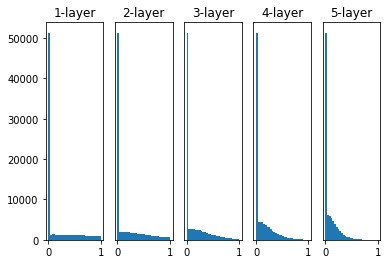

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
# leaky ReLUについて追加してみる
def lrelu(x, alpha=0.01):
    return np.where(x >= 0.0, x, alpha * x)

input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    #z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)
    #z = lrelu(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


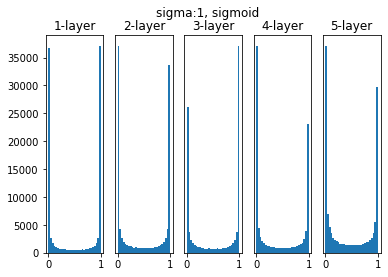

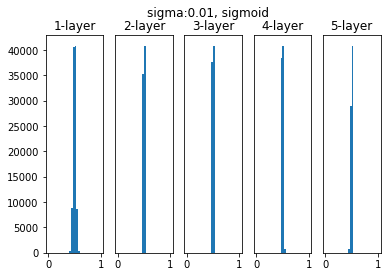

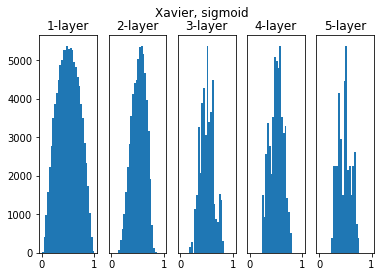

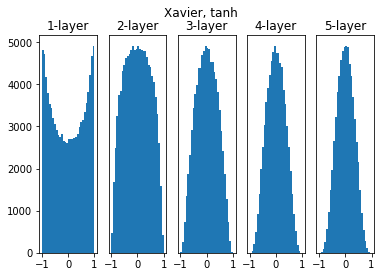

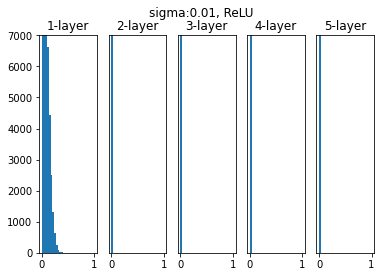

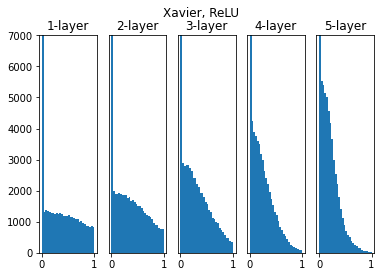

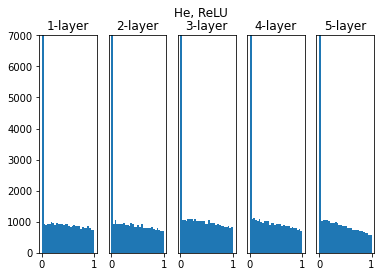

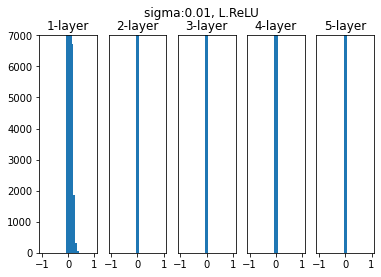

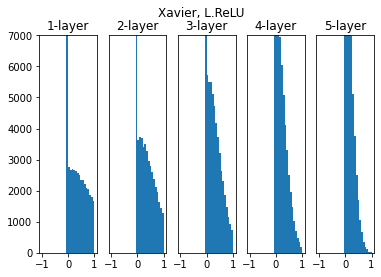

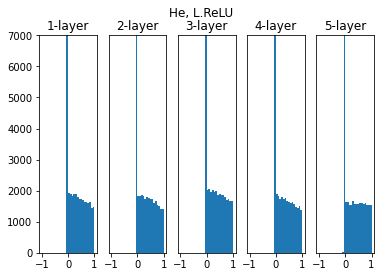

In [ ]:
# 一覧として表示
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)
    
# leaky ReLUについて追加してみる
def lrelu(x, alpha=0.01):
    return np.where(x >= 0.0, x, alpha * x)

input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    #z = ReLU(a)
    #z = tanh(a)
    #z = lrelu(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.suptitle("sigma:1, sigmoid")

plt.show()
#---------------------------------------------------------------------------

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.suptitle("sigma:0.01, sigmoid")

plt.show()

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = sigmoid(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.suptitle("Xavier, sigmoid")

plt.show()

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
    plt.suptitle("Xavier, tanh")

plt.show()

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.suptitle("sigma:0.01, ReLU")

plt.show()

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.suptitle("Xavier, ReLU")

plt.show()

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.suptitle("He, ReLU")

plt.show()

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = lrelu(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
    plt.suptitle("sigma:0.01, L.ReLU")

plt.show()

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = lrelu(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
    plt.suptitle("Xavier, L.ReLU")

plt.show()

activations = {}
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = lrelu(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
    plt.suptitle("He, L.ReLU")

plt.show()


## 6.2.4 MNISTデータセットによる重み初期値の比較

# ch06/weight_init_compare.py

===========iteration:0===========
std=0.01:2.3025128778533563
Xavier:2.2992258336530593
He:2.47907351687036
===========iteration:100===========
std=0.01:2.3016027525676908
Xavier:2.245403062251488
He:1.4205989610208272
===========iteration:200===========
std=0.01:2.301247011350658
Xavier:2.1563262025513916
He:0.6617072513832518
===========iteration:300===========
std=0.01:2.2992365444434713
Xavier:1.8755260178265376
He:0.39820142166783445
===========iteration:400===========
std=0.01:2.3049495156741617
Xavier:1.3838743078910887
He:0.4124897346355354
===========iteration:500===========
std=0.01:2.302393866306839
Xavier:0.9259782189849806
He:0.32881368200129596
===========iteration:600===========
std=0.01:2.3017298740653516
Xavier:0.7908447569285619
He:0.4419081261176372
===========iteration:700===========
std=0.01:2.302687301523143
Xavier:0.5710005013846289
He:0.31858868290789305
===========iteration:800===========
std=0.01:2.3031023925585252
Xavier:0.5614479083410983
He:0.30793937450674

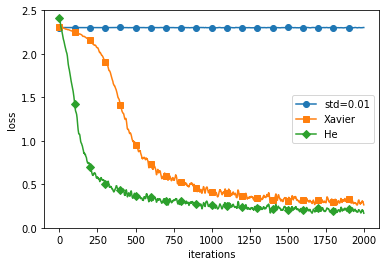

In [9]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

MultiLayerNetはcommon/multi_layer_net.pyで定義されている。  
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10, weight_init_std=weight_type)  
としていてweight_init_stdを指定していないのでデフォルトのreluが選択されている。  
また、最終層は  
self.last_layer = SoftmaxWithLoss()  
となっている。  
重みの初期値は、以下で設定している。  
- weight_init_std : 重みの標準偏差を指定（e.g. 0.01）  
- 'relu'または'he'を指定した場合は「Heの初期値」を設定  
- 'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定  

        


# 6.3 Batch Normalization
## 6.3.1 Batch Normalizationのアルゴリズム
p.187 図6-16  
Affine,BatchNorm,ReLU→Affine,BatchNorm,ReLU→Affine,Softmax  
↓のコードで784×100×100×10になっているのと同じ。  
（ここでは活性化関数の「前」にBatch Normalizationを挿入している。）

ミニバッチごとに正規化する。  
$$
μ_B ← \frac{1}{m}\sum^{m}_{i=1}x_i
$$
$$
σ^2_B ← \frac{1}{m} \sum^{m}_{i=1}(x_i - μ_B)^2
$$
$$
\hat{x}_i ← \frac{x_i-μ_B}{\sqrt{σ^2_B+ε}}
$$  
正規化されたデータ↑に固有のスケールとシフトで変換する。  
$$
y_i ← γ\hat{x}_i+β
$$
$γ$と$β$はパラメータで、$γ=1, β=0$からはじめて学習により調整する。

## Batch Normalizationの逆伝播の導出
参考：  
Batch Normレイヤの逆伝播【ゼロつく1のノート(数学)】  
https://www.anarchive-beta.com/entry/2020/08/17/180000  

Batch normalizationの逆伝播の算出式を計算グラフを辿って求める  
https://rikei-logistics.com/batch-normalization1

# ch06/batch_norm_gradient_check.py

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.05496716178121641
W3:0.0
b3:1.7990402263745597e-07


# 6.4 正則化
## 6.4.1 過学習

# ch06/batch_norm_test.py

============== 1/16 ==============
epoch:0 | 0.117 - 0.127


/content/drive/My Drive/dl-from-scratch/common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:1 | 0.097 - 0.143
epoch:2 | 0.097 - 0.137
epoch:3 | 0.097 - 0.157
epoch:4 | 0.097 - 0.187
epoch:5 | 0.097 - 0.212
epoch:6 | 0.097 - 0.237
epoch:7 | 0.097 - 0.265
epoch:8 | 0.097 - 0.278
epoch:9 | 0.097 - 0.31
epoch:10 | 0.097 - 0.334
epoch:11 | 0.097 - 0.345
epoch:12 | 0.097 - 0.367
epoch:13 | 0.097 - 0.373
epoch:14 | 0.097 - 0.393
epoch:15 | 0.097 - 0.41
epoch:16 | 0.097 - 0.415
epoch:17 | 0.097 - 0.427
epoch:18 | 0.097 - 0.456


epoch:19 | 0.097 - 0.457
============== 2/16 ==============
epoch:0 | 0.117 - 0.1


/content/drive/My Drive/dl-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/My Drive/dl-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/My Drive/dl-from-scratch/common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:1 | 0.097 - 0.1
epoch:2 | 0.097 - 0.112
epoch:3 | 0.097 - 0.148
epoch:4 | 0.097 - 0.168
epoch:5 | 0.097 - 0.194
epoch:6 | 0.097 - 0.214
epoch:7 | 0.097 - 0.251
epoch:8 | 0.097 - 0.283
epoch:9 | 0.097 - 0.304
epoch:10 | 0.097 - 0.326
epoch:11 | 0.097 - 0.352
epoch:12 | 0.097 - 0.379
epoch:13 | 0.097 - 0.395
epoch:14 | 0.097 - 0.415
epoch:15 | 0.097 - 0.438
epoch:16 | 0.097 - 0.444
epoch:17 | 0.097 - 0.472
epoch:18 | 0.097 - 0.49


epoch:19 | 0.097 - 0.496
============== 3/16 ==============
epoch:0 | 0.099 - 0.093
epoch:1 | 0.285 - 0.101
epoch:2 | 0.417 - 0.126
epoch:3 | 0.518 - 0.172
epoch:4 | 0.587 - 0.229
epoch:5 | 0.653 - 0.262
epoch:6 | 0.703 - 0.314
epoch:7 | 0.767 - 0.35
epoch:8 | 0.799 - 0.381
epoch:9 | 0.827 - 0.414
epoch:10 | 0.861 - 0.455
epoch:11 | 0.874 - 0.491
epoch:12 | 0.89 - 0.518
epoch:13 | 0.906 - 0.537
epoch:14 | 0.919 - 0.567
epoch:15 | 0.931 - 0.583
epoch:16 | 0.948 - 0.604
epoch:17 | 0.952 - 0.637


epoch:18 | 0.957 - 0.652
epoch:19 | 0.969 - 0.666
============== 4/16 ==============
epoch:0 | 0.124 - 0.126
epoch:1 | 0.352 - 0.143
epoch:2 | 0.466 - 0.182
epoch:3 | 0.531 - 0.244
epoch:4 | 0.599 - 0.292
epoch:5 | 0.651 - 0.35
epoch:6 | 0.674 - 0.399
epoch:7 | 0.716 - 0.444
epoch:8 | 0.722 - 0.484
epoch:9 | 0.757 - 0.53
epoch:10 | 0.781 - 0.575
epoch:11 | 0.799 - 0.61
epoch:12 | 0.811 - 0.633
epoch:13 | 0.828 - 0.658
epoch:14 | 0.842 - 0.685
epoch:15 | 0.846 - 0.709
epoch:16 | 0.856 - 0.726
epoch:17 | 0.867 - 0.741
epoch:18 | 0.874 - 0.753


epoch:19 | 0.877 - 0.772
============== 5/16 ==============
epoch:0 | 0.087 - 0.1
epoch:1 | 0.098 - 0.146
epoch:2 | 0.102 - 0.274
epoch:3 | 0.108 - 0.388
epoch:4 | 0.114 - 0.487
epoch:5 | 0.106 - 0.563
epoch:6 | 0.116 - 0.613
epoch:7 | 0.126 - 0.666
epoch:8 | 0.128 - 0.704
epoch:9 | 0.142 - 0.739
epoch:10 | 0.14 - 0.76
epoch:11 | 0.149 - 0.776
epoch:12 | 0.153 - 0.794
epoch:13 | 0.166 - 0.815
epoch:14 | 0.169 - 0.824
epoch:15 | 0.178 - 0.838
epoch:16 | 0.182 - 0.845
epoch:17 | 0.192 - 0.858


epoch:18 | 0.195 - 0.864
epoch:19 | 0.194 - 0.875
============== 6/16 ==============
epoch:0 | 0.103 - 0.103
epoch:1 | 0.104 - 0.168
epoch:2 | 0.14 - 0.402
epoch:3 | 0.111 - 0.573
epoch:4 | 0.12 - 0.679
epoch:5 | 0.131 - 0.73
epoch:6 | 0.125 - 0.767
epoch:7 | 0.12 - 0.795
epoch:8 | 0.118 - 0.82
epoch:9 | 0.117 - 0.847
epoch:10 | 0.118 - 0.87
epoch:11 | 0.119 - 0.883
epoch:12 | 0.123 - 0.903
epoch:13 | 0.117 - 0.91
epoch:14 | 0.117 - 0.919
epoch:15 | 0.117 - 0.93
epoch:16 | 0.117 - 0.937
epoch:17 | 0.117 - 0.944
epoch:18 | 0.117 - 0.956


epoch:19 | 0.117 - 0.957
============== 7/16 ==============
epoch:0 | 0.1 - 0.09
epoch:1 | 0.116 - 0.282
epoch:2 | 0.116 - 0.626
epoch:3 | 0.116 - 0.734
epoch:4 | 0.117 - 0.794
epoch:5 | 0.116 - 0.829
epoch:6 | 0.116 - 0.861
epoch:7 | 0.116 - 0.884
epoch:8 | 0.116 - 0.897
epoch:9 | 0.116 - 0.911
epoch:10 | 0.116 - 0.926
epoch:11 | 0.116 - 0.94
epoch:12 | 0.116 - 0.95
epoch:13 | 0.116 - 0.96
epoch:14 | 0.116 - 0.966
epoch:15 | 0.116 - 0.972
epoch:16 | 0.116 - 0.975
epoch:17 | 0.116 - 0.98


epoch:18 | 0.116 - 0.986
epoch:19 | 0.116 - 0.989
============== 8/16 ==============
epoch:0 | 0.105 - 0.144
epoch:1 | 0.117 - 0.515
epoch:2 | 0.117 - 0.711
epoch:3 | 0.117 - 0.775
epoch:4 | 0.117 - 0.81
epoch:5 | 0.116 - 0.847
epoch:6 | 0.116 - 0.876
epoch:7 | 0.117 - 0.918
epoch:8 | 0.117 - 0.943
epoch:9 | 0.117 - 0.961
epoch:10 | 0.117 - 0.975
epoch:11 | 0.117 - 0.981
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.087 - 0.108
epoch:1 | 0.116 - 0.496
epoch:2 | 0.117 - 0.75
epoch:3 | 0.117 - 0.828
epoch:4 | 0.117 - 0.9
epoch:5 | 0.117 - 0.936
epoch:6 | 0.117 - 0.965
epoch:7 | 0.117 - 0.972
epoch:8 | 0.117 - 0.984
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.097 - 0.108
epoch:1 | 0.099 - 0.497
epoch:2 | 0.116 - 0.694
epoch:3 | 0.116 - 0.626
epoch:4 | 0.116 - 0.777
epoch:5 | 0.116 - 0.785
epoch:6 | 0.116 - 0.837
epoch:7 | 0.117 - 0.893
epoch:8 | 0.117 - 0.933
epoch:9 | 0.117 - 0.959
epoch:10 | 0.117 - 0.984
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.959
epoch:17 | 0.117 - 0.986


epoch:18 | 0.117 - 0.99
epoch:19 | 0.117 - 0.997
============== 11/16 ==============
epoch:0 | 0.097 - 0.178
epoch:1 | 0.117 - 0.61
epoch:2 | 0.117 - 0.729
epoch:3 | 0.117 - 0.66
epoch:4 | 0.117 - 0.749
epoch:5 | 0.117 - 0.787
epoch:6 | 0.117 - 0.787
epoch:7 | 0.117 - 0.73
epoch:8 | 0.117 - 0.781
epoch:9 | 0.117 - 0.803
epoch:10 | 0.116 - 0.791
epoch:11 | 0.117 - 0.811
epoch:12 | 0.117 - 0.888
epoch:13 | 0.117 - 0.896
epoch:14 | 0.117 - 0.806
epoch:15 | 0.117 - 0.9
epoch:16 | 0.117 - 0.904
epoch:17 | 0.116 - 0.902


epoch:18 | 0.116 - 0.906
epoch:19 | 0.116 - 0.907
============== 12/16 ==============
epoch:0 | 0.116 - 0.176
epoch:1 | 0.116 - 0.552
epoch:2 | 0.116 - 0.674
epoch:3 | 0.117 - 0.68
epoch:4 | 0.117 - 0.685
epoch:5 | 0.117 - 0.707
epoch:6 | 0.117 - 0.769
epoch:7 | 0.117 - 0.858
epoch:8 | 0.117 - 0.863
epoch:9 | 0.117 - 0.812
epoch:10 | 0.117 - 0.885
epoch:11 | 0.117 - 0.891
epoch:12 | 0.117 - 0.899
epoch:13 | 0.117 - 0.876
epoch:14 | 0.117 - 0.894
epoch:15 | 0.117 - 0.898
epoch:16 | 0.117 - 0.9
epoch:17 | 0.117 - 0.896
epoch:18 | 0.117 - 0.773
epoch:19 | 0.117 - 0.887


============== 13/16 ==============
epoch:0 | 0.116 - 0.21
epoch:1 | 0.117 - 0.539
epoch:2 | 0.117 - 0.609
epoch:3 | 0.117 - 0.644
epoch:4 | 0.117 - 0.67
epoch:5 | 0.117 - 0.73
epoch:6 | 0.117 - 0.73
epoch:7 | 0.117 - 0.713
epoch:8 | 0.117 - 0.758
epoch:9 | 0.117 - 0.783
epoch:10 | 0.117 - 0.76
epoch:11 | 0.117 - 0.699
epoch:12 | 0.117 - 0.724
epoch:13 | 0.117 - 0.778
epoch:14 | 0.117 - 0.783
epoch:15 | 0.117 - 0.793
epoch:16 | 0.117 - 0.797
epoch:17 | 0.117 - 0.79
epoch:18 | 0.117 - 0.779


epoch:19 | 0.117 - 0.796
============== 14/16 ==============
epoch:0 | 0.117 - 0.136
epoch:1 | 0.116 - 0.391
epoch:2 | 0.117 - 0.429
epoch:3 | 0.117 - 0.456
epoch:4 | 0.117 - 0.488
epoch:5 | 0.117 - 0.49
epoch:6 | 0.117 - 0.496
epoch:7 | 0.117 - 0.509
epoch:8 | 0.117 - 0.502
epoch:9 | 0.117 - 0.513
epoch:10 | 0.117 - 0.506
epoch:11 | 0.117 - 0.517
epoch:12 | 0.116 - 0.516
epoch:13 | 0.116 - 0.521
epoch:14 | 0.116 - 0.612
epoch:15 | 0.116 - 0.611
epoch:16 | 0.116 - 0.612
epoch:17 | 0.116 - 0.612
epoch:18 | 0.116 - 0.614


epoch:19 | 0.116 - 0.614
============== 15/16 ==============
epoch:0 | 0.093 - 0.214
epoch:1 | 0.117 - 0.373
epoch:2 | 0.117 - 0.291
epoch:3 | 0.117 - 0.369
epoch:4 | 0.117 - 0.453
epoch:5 | 0.117 - 0.484
epoch:6 | 0.117 - 0.492
epoch:7 | 0.117 - 0.503
epoch:8 | 0.117 - 0.504
epoch:9 | 0.117 - 0.502
epoch:10 | 0.117 - 0.508
epoch:11 | 0.117 - 0.512
epoch:12 | 0.116 - 0.506
epoch:13 | 0.116 - 0.485
epoch:14 | 0.116 - 0.504
epoch:15 | 0.116 - 0.505
epoch:16 | 0.116 - 0.514
epoch:17 | 0.116 - 0.515
epoch:18 | 0.117 - 0.516


epoch:19 | 0.117 - 0.517
============== 16/16 ==============
epoch:0 | 0.097 - 0.156
epoch:1 | 0.116 - 0.177
epoch:2 | 0.117 - 0.403
epoch:3 | 0.117 - 0.392
epoch:4 | 0.117 - 0.423
epoch:5 | 0.117 - 0.42
epoch:6 | 0.117 - 0.429
epoch:7 | 0.117 - 0.427
epoch:8 | 0.117 - 0.398
epoch:9 | 0.116 - 0.428
epoch:10 | 0.116 - 0.43
epoch:11 | 0.116 - 0.43
epoch:12 | 0.116 - 0.431
epoch:13 | 0.116 - 0.43
epoch:14 | 0.116 - 0.431
epoch:15 | 0.116 - 0.504
epoch:16 | 0.116 - 0.51
epoch:17 | 0.116 - 0.527
epoch:18 | 0.116 - 0.524
epoch:19 | 0.116 - 0.524


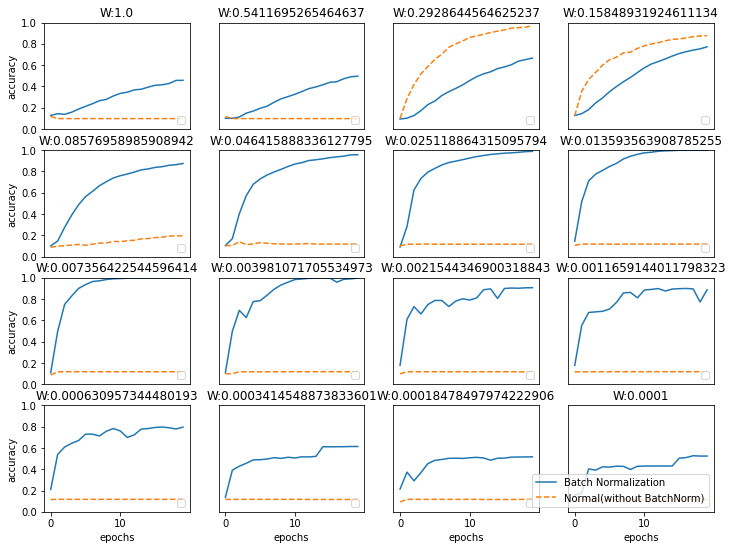

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(12,9))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## 6.4.2 Weight decay
L2ノルムのWeight decay  

$\frac{1}{2}λ\mathbf W^2$  

$\mathbf W$：重み  

$λ$：正則化の強さをコントロールするハイパーパラメータ  

L2ノルム：  
　重み：$\mathbf W=(w_1,w_2,\cdots,w_n)$  

　L2ノルム：$\sqrt{w_1^2+w_2^2+\cdots+w_n^2} $

# ch06/overfit_weight_decay.py

epoch:0, train acc:0.10333333333333333, test acc:0.1085
epoch:1, train acc:0.13, test acc:0.1217
epoch:2, train acc:0.15, test acc:0.1327
epoch:3, train acc:0.16666666666666666, test acc:0.139
epoch:4, train acc:0.2, test acc:0.1456
epoch:5, train acc:0.19333333333333333, test acc:0.1447
epoch:6, train acc:0.22333333333333333, test acc:0.1529
epoch:7, train acc:0.2733333333333333, test acc:0.1578
epoch:8, train acc:0.2733333333333333, test acc:0.1574
epoch:9, train acc:0.31333333333333335, test acc:0.1735
epoch:10, train acc:0.30666666666666664, test acc:0.1703
epoch:11, train acc:0.35333333333333333, test acc:0.1982
epoch:12, train acc:0.33666666666666667, test acc:0.2017
epoch:13, train acc:0.4033333333333333, test acc:0.2493
epoch:14, train acc:0.3933333333333333, test acc:0.2443
epoch:15, train acc:0.38666666666666666, test acc:0.231
epoch:16, train acc:0.43666666666666665, test acc:0.2816
epoch:17, train acc:0.4533333333333333, test acc:0.3004
epoch:18, train acc:0.52, test acc:0.

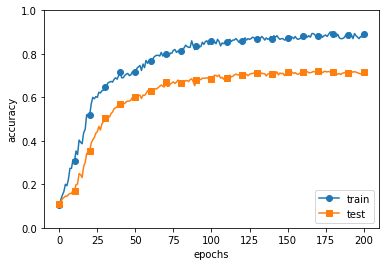

In [5]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6.4.3 Dropout

# ch06/overfit_dropout.py

train loss:2.3207532092547605
=== epoch:1, train acc:0.11, test acc:0.108 ===
train loss:2.3307513608223474
train loss:2.308606599543666
train loss:2.328244585768992
=== epoch:2, train acc:0.11, test acc:0.1069 ===
train loss:2.3063949426579478
train loss:2.302226748411895
train loss:2.317475045715387
=== epoch:3, train acc:0.11, test acc:0.109 ===
train loss:2.311781774109777
train loss:2.3045042905897457
train loss:2.296590125409386
=== epoch:4, train acc:0.11, test acc:0.1159 ===
train loss:2.304580045941041
train loss:2.3215036135148566
train loss:2.3196859743492526
=== epoch:5, train acc:0.12333333333333334, test acc:0.1172 ===
train loss:2.2885021249615543
train loss:2.29920991466644
train loss:2.300497633745509
=== epoch:6, train acc:0.12666666666666668, test acc:0.1198 ===
train loss:2.303959738859988
train loss:2.318562340075129
train loss:2.298492109976969
=== epoch:7, train acc:0.12666666666666668, test acc:0.1194 ===
train loss:2.286068487843191
train loss:2.298518808146641

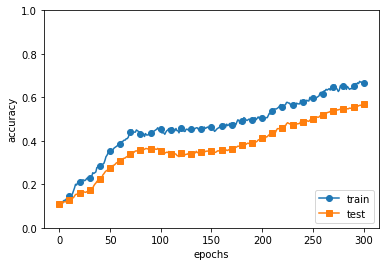

In [6]:
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6.5.2 ハイパーパラメータの最適化

# ch06/hyperparameter_optimization.py

val acc:0.08 | lr:3.136326917883268e-06, weight decay:4.075638415174689e-08
val acc:0.07 | lr:0.00013829786140536447, weight decay:7.48412507743761e-08
val acc:0.07 | lr:0.00028805600853890637, weight decay:1.3711966894871098e-08
val acc:0.07 | lr:1.1076130627701558e-05, weight decay:2.104366563911073e-07
val acc:0.09 | lr:6.538624659199518e-05, weight decay:1.753642977504977e-08
val acc:0.66 | lr:0.004061026737329865, weight decay:4.9371103833220426e-06
val acc:0.1 | lr:2.361929237835768e-06, weight decay:3.165187830992039e-07
val acc:0.1 | lr:1.3251087839161115e-05, weight decay:2.1132203053926546e-06
val acc:0.2 | lr:0.0005539172589083464, weight decay:1.9780153412099308e-08
val acc:0.28 | lr:0.0008983994686616265, weight decay:8.135993463119815e-07
val acc:0.12 | lr:1.9297534887690867e-05, weight decay:9.323586675054322e-05
val acc:0.19 | lr:0.0005722427237561707, weight decay:3.568978171529652e-05
val acc:0.19 | lr:0.0004829637741483906, weight decay:2.0009487117925214e-05
val acc

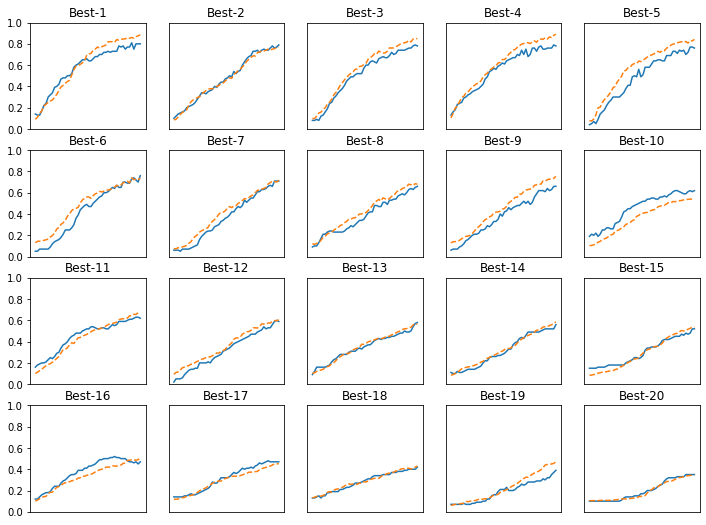

In [8]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
plt.figure(figsize=(12,9))

print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()